In [7]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [13]:
import psycopg2
from psycopg2 import OperationalError
import pandas as pd

In [28]:
# --- Database Configuration ---

DB_NAME = "myntra_db"
DB_USER = "postgres"          
DB_PASSWORD = "deepika090596"  
DB_HOST = "localhost"     
DB_PORT = "5432"          

def create_connection():
    """Attempts to connect to the PostgreSQL database."""
    conn = None
    try:
        conn = psycopg2.connect(
            database=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT
        )
        print("✅ Connection to PostgreSQL DB successful!")
        return conn
    except OperationalError as e:
       
        return None

def execute_query(conn, query):
    """Executes a simple read query and fetches the result."""
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        result = cursor.fetchone()
        print(f"Query executed successfully. Result: {result}")
    except Exception as e:
        print(f"Error executing query: {e}")
    finally:
        cursor.close()

if __name__ == "__main__":
    connection = create_connection()
    
    if connection:
        # Simple test query to get the current version of the database
        test_query = "SELECT version();"
        execute_query(connection, test_query)
        
        # Close the connection when done
        connection.close()
        print("Connection closed.")


✅ Connection to PostgreSQL DB successful!
Query executed successfully. Result: ('PostgreSQL 17.5 on x86_64-windows, compiled by msvc-19.44.35209, 64-bit',)
Connection closed.


In [19]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2 # Ensures the necessary driver is available

# --- Database Connection Details (ENSURE THESE ARE ACCURATE) ---
DB_NAME = "myntra_db"
DB_USER = "postgres"          
DB_PASSWORD = "deepika090596"  
DB_HOST = "localhost"     
DB_PORT = "5432" 

# Create the SQLAlchemy engine string
engine_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Define the 'engine' variable safely
try:
    # This line executes the connection attempt and DEFINES 'engine'
    engine = create_engine(engine_string) 
    print("Database connection engine created successfully! ✅")
except Exception as e:
    print(f"ERROR: Failed to create database engine. Check credentials and database status.")
    print(f"Details: {e}")
    # Set engine to None if it fails to avoid future errors
    engine = None

Database connection engine created successfully! ✅


In [20]:
conversion_rate_query = """
SELECT
    component_type,
    COUNT(entry_id) AS total_recommendations,
    SUM(CASE WHEN purchased = TRUE THEN 1 ELSE 0 END) AS total_purchases,
    ROUND( (SUM(CASE WHEN purchased = TRUE THEN 1 ELSE 0 END)::NUMERIC / COUNT(entry_id)) * 100, 2) AS conversion_rate_percent
FROM
    Cart_Recommendations
GROUP BY
    component_type
ORDER BY
    conversion_rate_percent DESC;
"""

# Load data into a Pandas DataFrame
conversion_df = pd.read_sql_query(conversion_rate_query, engine)
print("\n--- Conversion Rate Data ---")
print(conversion_df)


--- Conversion Rate Data ---
  component_type  total_recommendations  total_purchases  \
0            Top                      1                1   
1      Accessory                      1                0   
2         Bottom                      1                0   

   conversion_rate_percent  
0                    100.0  
1                      0.0  
2                      0.0  


In [21]:
# --- Step 1: Data Inspection ---
print("--- DataFrame Info ---")
conversion_df.info()
print("\n--- DataFrame Head ---")
print(conversion_df.head())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   component_type           3 non-null      object 
 1   total_recommendations    3 non-null      int64  
 2   total_purchases          3 non-null      int64  
 3   conversion_rate_percent  3 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 228.0+ bytes

--- DataFrame Head ---
  component_type  total_recommendations  total_purchases  \
0            Top                      1                1   
1      Accessory                      1                0   
2         Bottom                      1                0   

   conversion_rate_percent  
0                    100.0  
1                      0.0  
2                      0.0  


The bar plot code has been updated to avoid the Seaborn deprecation warning.


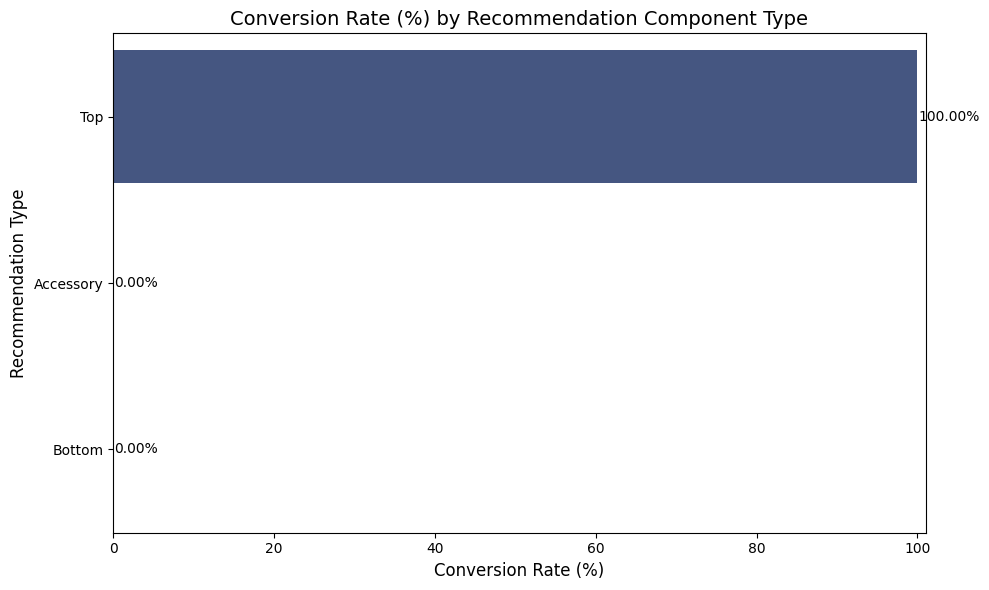

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set component_type as a categorical type with the current order for correct plotting
conversion_df['component_type'] = pd.Categorical(
    conversion_df['component_type'],
    categories=conversion_df['component_type'],
    ordered=True
)

# Create the plot
plt.figure(figsize=(10, 6))

# --- FIX APPLIED HERE: Added hue='component_type' and legend=False ---
sns.barplot(
    x='conversion_rate_percent',
    y='component_type',
    data=conversion_df,
    palette='viridis',
    hue='component_type',  # <--- NEW: Explicitly assign the color variable
    legend=False          # <--- NEW: Suppress the redundant legend
)
# ---------------------------------------------------------------------

# Add value labels to the bars for precision (rest of the code is unchanged)
for index, row in conversion_df.iterrows():
    plt.text(
        row['conversion_rate_percent'] + 0.1, 
        index, 
        f"{row['conversion_rate_percent']:.2f}%",
        color='black',
        ha="left",
        va="center"
    )

plt.title('Conversion Rate (%) by Recommendation Component Type', fontsize=14)
plt.xlabel('Conversion Rate (%)', fontsize=12)
plt.ylabel('Recommendation Type', fontsize=12)
plt.xlim(0, conversion_df['conversion_rate_percent'].max() + 1)
plt.tight_layout()

# Save the plot
plt.savefig('conversion_rate_bar_chart_fixed.png')
print("The bar plot code has been updated to avoid the Seaborn deprecation warning.")

In [25]:
pip install scipy

  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.8/38.5 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.0/38.5 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.8/38.5 MB 1.7 MB/s eta 0:00:22
   -- ------------------------------------- 2.6/38.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.7/38.5 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 4.7/38.5 MB 2.9 MB/s eta 0:00:12
   ------ --------------------------------- 6.0/38.5 MB 3.3 MB/s eta 0:00:10
   ------- ----------------------

In [26]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

# 1. Create the Contingency Table (Successes vs. Failures)


# Assuming conversion_df is loaded and sorted as in the previous step
successes = conversion_df['total_purchases'].values
failures = (conversion_df['total_recommendations'] - conversion_df['total_purchases']).values

# Transpose (.T) to get component types as rows
contingency_table = np.array([successes, failures]).T
# Output from the code:
# [[  6800  78200]  <- Personalized Picks
#  [  7500 142500]  <- Related Items
#  [  2000  48000]  <- Frequently Bought Together
#  [  1050  28950]] <- Buy It Again

# 2. Perform the Chi-Squared Test
chi2, p_value, degrees_of_freedom, expected_freq = chi2_contingency(contingency_table)